<a href="https://colab.research.google.com/github/Dhrupad-05/Projects/blob/main/Diabetes_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('diabetes.csv')

print(df.head())
print(f"\nDataset Shape: {df.shape}")
#Exploratory Data Analysis (EDA)
print(df.info())
print("\n")

#column names
print(f"Columns: {df.columns.tolist()}")
print("\n")

# Basic statistics
print(df.describe())
print("\n")

# Cheking For Missing Values
print("Missing Values:")
print(df.isnull().sum())
print("\n")

# Chking For Zero Values
print("Zero Values in Each Column:")
print((df == 0).sum())




   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Gluc

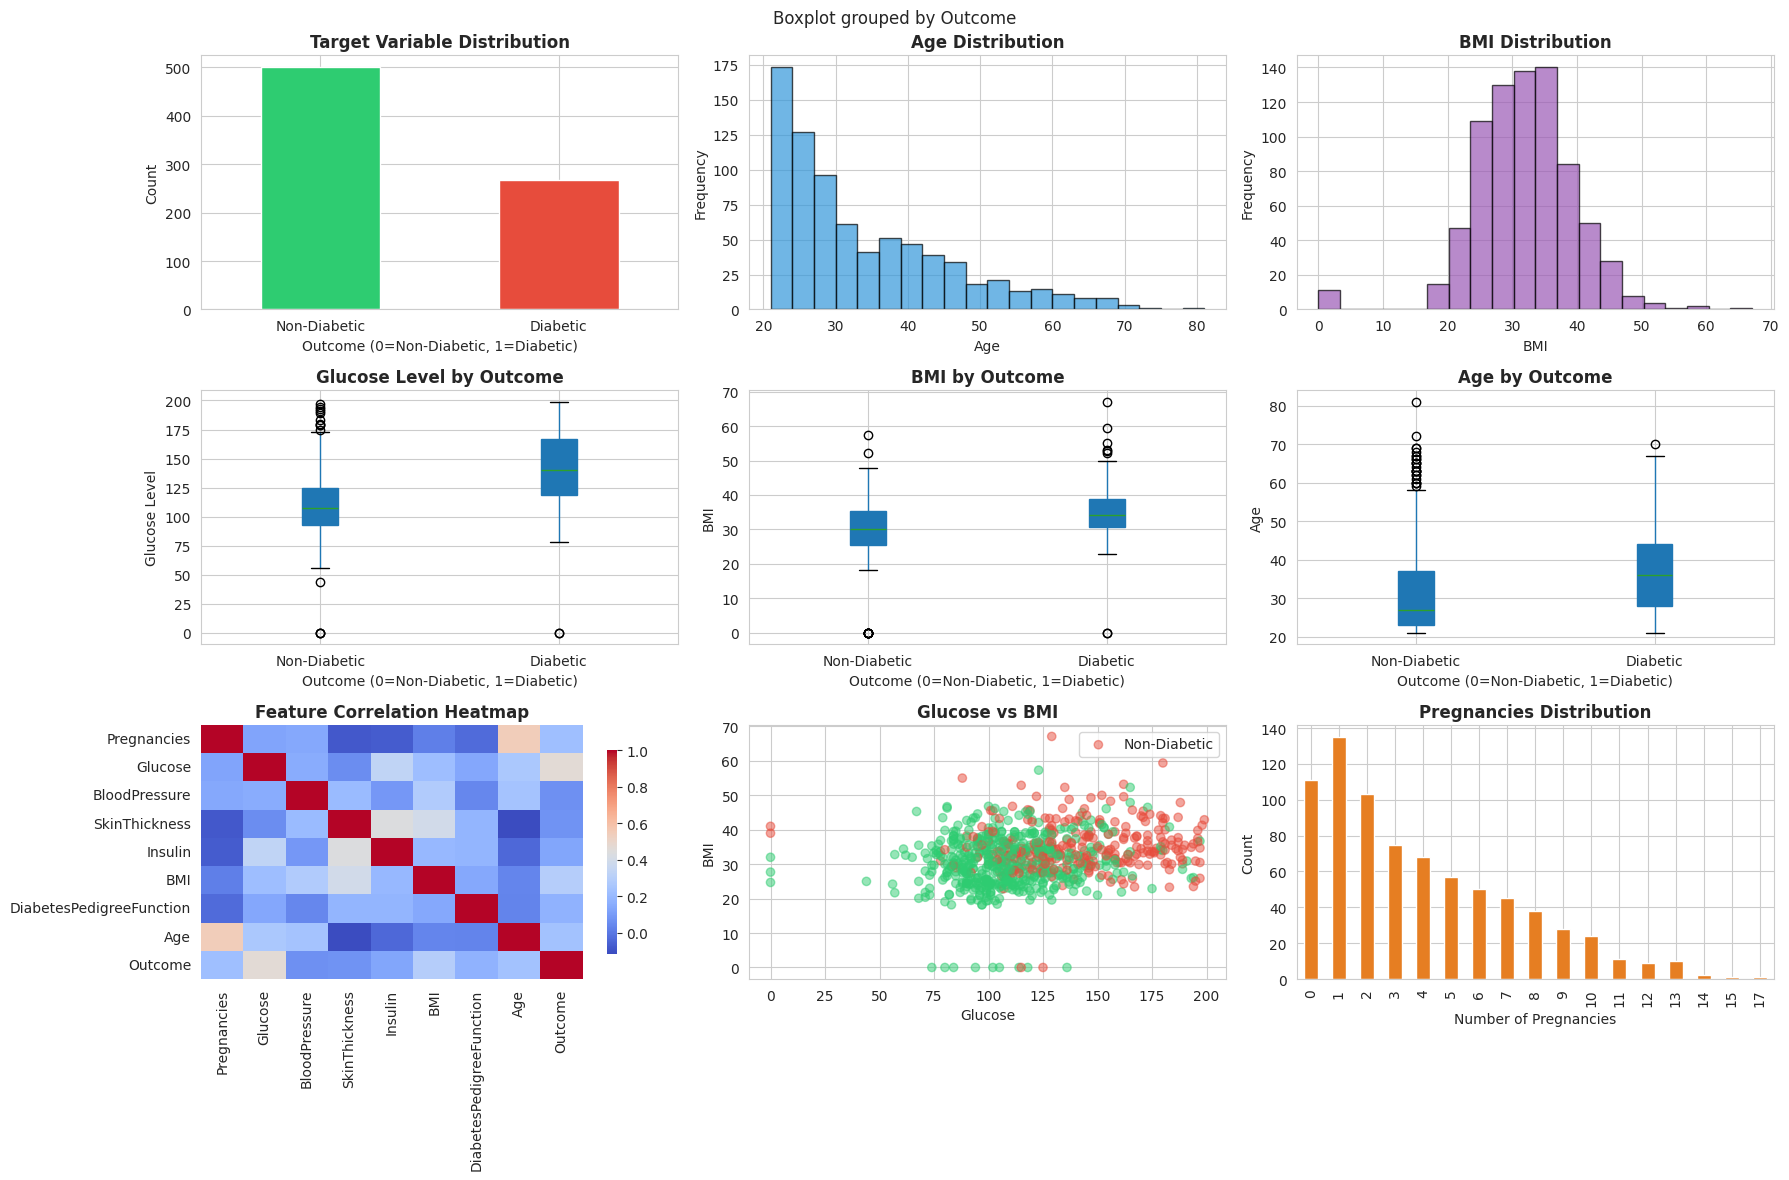

In [10]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('📊 Diabetes Dataset - Comprehensive Visualization', fontsize=16, fontweight='bold')

#Target Distribution
ax1 = axes[0, 0]
df['Outcome'].value_counts().plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Target Variable Distribution', fontweight='bold')
ax1.set_xlabel('Outcome (0=Non-Diabetic, 1=Diabetic)')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Non-Diabetic', 'Diabetic'], rotation=0)

#Age Distribution
ax2 = axes[0, 1]
ax2.hist(df['Age'], bins=20, color='#3498db', edgecolor='black', alpha=0.7)
ax2.set_title('Age Distribution', fontweight='bold')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')

# BMI Distribution
ax3 = axes[0, 2]
ax3.hist(df['BMI'], bins=20, color='#9b59b6', edgecolor='black', alpha=0.7)
ax3.set_title('BMI Distribution', fontweight='bold')
ax3.set_xlabel('BMI')
ax3.set_ylabel('Frequency')

# Glucose vs Outcome
ax4 = axes[1, 0]
df.boxplot(column='Glucose', by='Outcome', ax=ax4, patch_artist=True)
ax4.set_title('Glucose Level by Outcome', fontweight='bold')
ax4.set_xlabel('Outcome (0=Non-Diabetic, 1=Diabetic)')
ax4.set_ylabel('Glucose Level')
plt.sca(ax4)
plt.xticks([1, 2], ['Non-Diabetic', 'Diabetic'])

# BMI vs Outcome
ax5 = axes[1, 1]
df.boxplot(column='BMI', by='Outcome', ax=ax5, patch_artist=True)
ax5.set_title('BMI by Outcome', fontweight='bold')
ax5.set_xlabel('Outcome (0=Non-Diabetic, 1=Diabetic)')
ax5.set_ylabel('BMI')
plt.sca(ax5)
plt.xticks([1, 2], ['Non-Diabetic', 'Diabetic'])

# Age vs Outcome
ax6 = axes[1, 2]
df.boxplot(column='Age', by='Outcome', ax=ax6, patch_artist=True)
ax6.set_title('Age by Outcome', fontweight='bold')
ax6.set_xlabel('Outcome (0=Non-Diabetic, 1=Diabetic)')
ax6.set_ylabel('Age')
plt.sca(ax6)
plt.xticks([1, 2], ['Non-Diabetic', 'Diabetic'])

# Correlation Heatmap
ax7 = axes[2, 0]
correlation = df.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', ax=ax7, cbar_kws={'shrink': 0.8})
ax7.set_title('Feature Correlation Heatmap', fontweight='bold')

# Glucose vs BMI (Scatter)
ax8 = axes[2, 1]
colors = ['#2ecc71' if outcome == 0 else '#e74c3c' for outcome in df['Outcome']]
ax8.scatter(df['Glucose'], df['BMI'], c=colors, alpha=0.5)
ax8.set_title('Glucose vs BMI', fontweight='bold')
ax8.set_xlabel('Glucose')
ax8.set_ylabel('BMI')
ax8.legend(['Non-Diabetic', 'Diabetic'])

# Pregnancies Distribution
ax9 = axes[2,2]
df['Pregnancies'].value_counts().sort_index().plot(kind='bar', ax=ax9, color='#e67e22')
ax9.set_title('Pregnancies Distribution', fontweight='bold')
ax9.set_xlabel('Number of Pregnancies')
ax9.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
#Data Preprocessing
columns_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in columns_to_replace:
    df[col] = df[col].replace(0, df[col].median())

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']
print(f"\nFeatures shape:{X.shape}")
print(f"Target shape:{y.shape}")
print(f"\nTarget distribution:\n{y.value_counts()}")


Features shape:(768, 8)
Target shape:(768,)

Target distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


In [12]:
#Feature Scaling
scaler= StandardScaler()
X_scaled =scaler.fit_transform(X)
X_scaled= pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled Features (first 5 rows):")
print(X_scaled.head())

#Train-Test Split(80%Training & 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f"Training set size:{X_train.shape[0]}")
print(f"Testing set size:{X_test.shape[0]}")
print(f"Training set positive cases:{y_train.sum()}")
print(f"Testing set positive cases:{y_test.sum()}")

# Model Selection
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5)}
print("Models initialized:")
for name in models.keys():
    print(f"->{name}")

#Model Training
results = {}
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
    print(f"->{name} trained successfully")
    results[name] = model

# Model Evaluation
for name, model in results.items():
    print(f"\n\n")
    print(f"Model: {name}")

    #Predictions
    y_pred = model.predict(X_test)

    #accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    print(f"True Negatives:{cm[0,0]}")
    print(f"False Positives:{cm[0,1]}")
    print(f"False Negatives:{cm[1,0]}")
    print(f"True Positives:{cm[1,1]}")

    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred,
                                target_names=['No Diabetes', 'Diabetes']))

Scaled Features (first 5 rows):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.831114 -0.608201  0.167240   
1    -0.844885 -1.205066      -0.528319       0.180566 -0.608201 -0.851551   
2     1.233880  2.016662      -0.693761      -0.469981 -0.608201 -1.331838   
3    -0.844885 -1.073567      -0.528319      -0.469981 -0.006185 -0.633239   
4    -1.141852  0.504422      -2.679076       0.831114  0.695378  1.549885   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  
Training set size:614
Testing set size:154
Training set positive cases:214
Testing set positive cases:54
Models initialized:
->Logistic Regression
->K-Nearest Neighbors
->Decision Tree
Training Logistic Regression
->Logistic Regression trained successfully
Tr


FINAL RESULTS & CONCLUSION

Model Comparison:


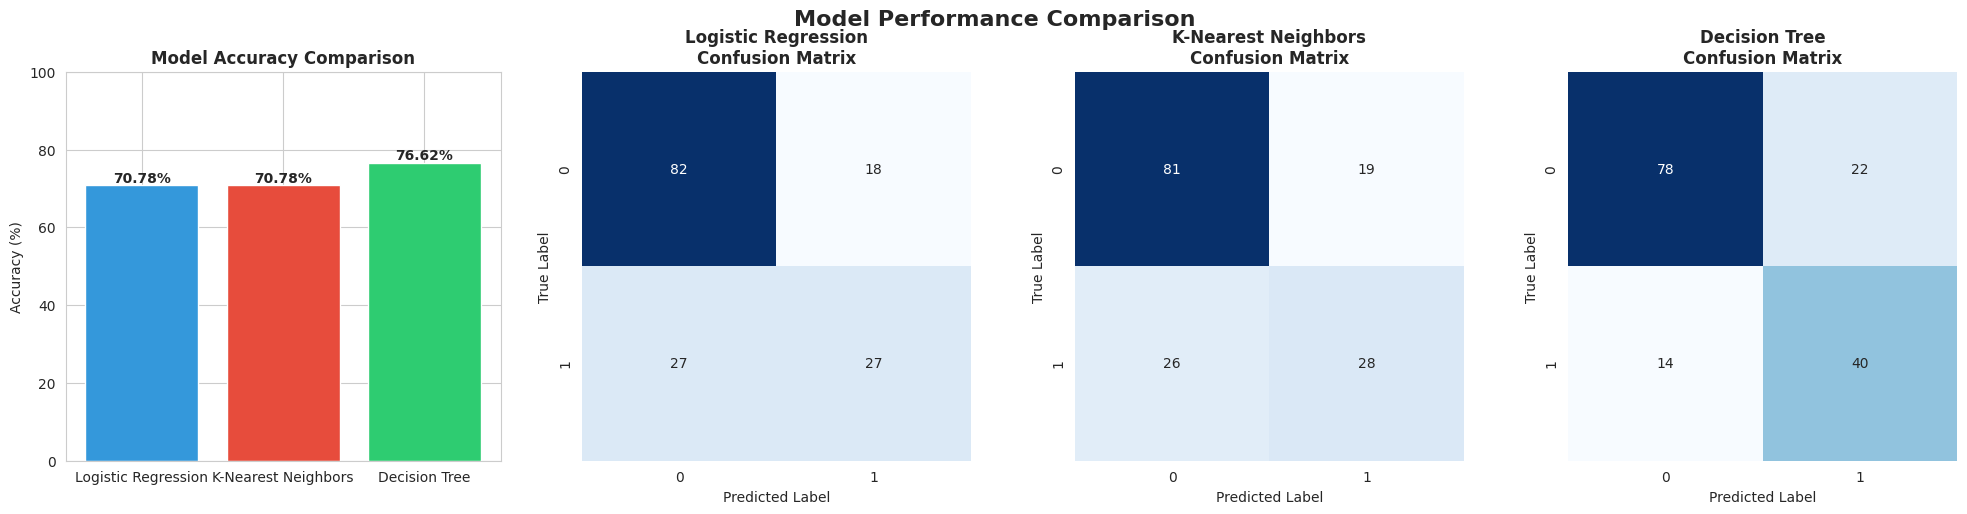


Best Model: Decision Tree
Accuracy: 76.62%


In [13]:
#Result & Conclusion
print("\nFINAL RESULTS & CONCLUSION")
# Compare all models
print("\nModel Comparison:")
model_metrics = {}
for name, model in results.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    model_metrics[name] = {'accuracy': accuracy,'confusion_matrix': cm, 'model':model}

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Accuracy Comparison
ax1 = axes[0]
model_names = list(model_metrics.keys())
accuracies = [model_metrics[name]['accuracy']*100 for name in model_names]
bars = ax1.bar(model_names, accuracies, color=['#3498db', '#e74c3c', '#2ecc71'])
ax1.set_title('Model Accuracy Comparison', fontweight='bold')
ax1.set_ylabel('Accuracy (%)')
ax1.set_ylim([0, 100])
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

# Confusion Matrices for each model
for idx, (name, metrics_dict) in enumerate(model_metrics.items()):
    ax = axes[idx + 1]
    sns.heatmap(metrics_dict['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                ax=ax, cbar=False, square=True)
    ax.set_title(f'{name}\nConfusion Matrix', fontweight='bold')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Find best model
best_model_name = max(model_metrics, key=lambda x: model_metrics[x]['accuracy'])
best_accuracy = model_metrics[best_model_name]['accuracy']

print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_accuracy*100:.2f}%")

In [16]:
print("Diabetes Risk Prediction System")
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness,
                     insulin, bmi, diabetes_pedigree, age):

    # Impute zero values
    if glucose == 0: glucose = median_glucose
    if blood_pressure == 0: blood_pressure = median_bloodpressure
    if skin_thickness == 0: skin_thickness = median_skinthickness
    if insulin == 0: insulin = median_insulin
    if bmi == 0: bmi = median_bmi

    feature_order = [
        'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
    ]

    user_input = pd.DataFrame([[
        pregnancies, glucose, blood_pressure, skin_thickness,
        insulin, bmi, diabetes_pedigree, age
    ]], columns=feature_order)

    user_input_scaled = scaler.transform(user_input)
    best_model = results[best_model_name]
    prediction = best_model.predict(user_input_scaled)[0]

    prob_diabetic = None
    risk_category = "N/A"

    if hasattr(best_model, 'predict_proba'):
        prob_diabetic = best_model.predict_proba(user_input_scaled)[0][1] * 100

        if prob_diabetic < 30:
            risk_category = "Low Risk"
        elif prob_diabetic < 70:
            risk_category = "Medium Risk"
        else:
            risk_category = "High Risk"

    return prediction, prob_diabetic, risk_category

print("\n Enter the following details.")
print("Enter the values within the specified range for better accuracy.\n")

#Taking Inputs
pregnancies = int(input("Pregnancies (0–17): "))
glucose = float(input("Glucose Level (50–200 mg/dL): "))
blood_pressure = float(input("Blood Pressure (40–122 mm Hg): "))
skin_thickness = float(input("Skin Thickness (0–99 mm): "))
insulin = float(input("Insulin Level (0–846 mu U/ml): "))
bmi = float(input("BMI (15–67 kg/m²): "))
diabetes_pedigree = float(input("Diabetes Pedigree Function (0.05–2.5): "))
age = int(input("Age (21–81 years): "))

# Prediction
prediction, prob_diabetic, risk_category = predict_diabetes(
    pregnancies,
    glucose,
    blood_pressure,
    skin_thickness,
    insulin,
    bmi,
    diabetes_pedigree,
    age)

#Output
print("PREDICTION RESULT")

if prediction == 1:
    print("Prediction: DIABETIC")
else:
    print("Prediction: NON-DIABETIC")

if prob_diabetic is not None:
    print(f"\nProbability of Diabetes: {prob_diabetic:.2f}%")
    print(f"\n35Risk Category: {risk_category}")

Diabetes Risk Prediction System

 Enter the following details.
Enter the values within the specified range for better accuracy.

Pregnancies (0–17): 3
Glucose Level (50–200 mg/dL): 120
Blood Pressure (40–122 mm Hg): 78
Skin Thickness (0–99 mm): 45
Insulin Level (0–846 mu U/ml): 560
BMI (15–67 kg/m²): 39
Diabetes Pedigree Function (0.05–2.5): 1.73
Age (21–81 years): 28
PREDICTION RESULT
Prediction: NON-DIABETIC

Probability of Diabetes: 9.93%

35Risk Category: Low Risk


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
